***Importing Libraries and Dataset***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv']))

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.dropna(subset=df.columns[:6],inplace=True)

In [ ]:
df.shape

(342, 7)

***Descriptive Statistics***

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df['species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [ ]:
adelie_sp =  df[df['species']=='Adelie']
adelie_sp.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [ ]:
gentoo_sp =  df[df['species']=='Gentoo']
gentoo_sp.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [ ]:
chinstrap_sp =  df[df['species']=='Chinstrap']
chinstrap_sp.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


***Univariate Analysis***

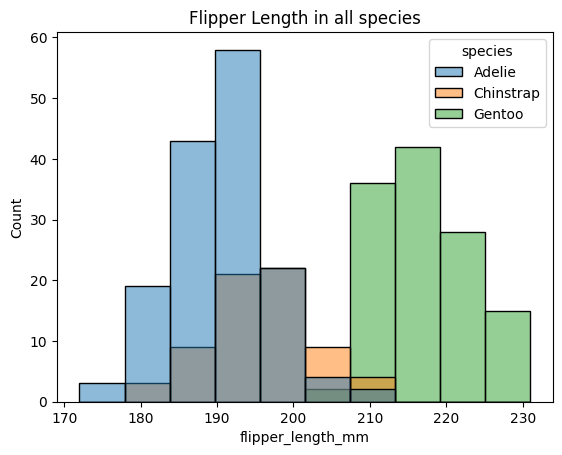

In [ ]:
sns.histplot(df,x='flipper_length_mm',hue='species').set(title='Flipper Length in all species');

[Text(0.5, 1.0, 'Bill length in Culmen (mm)')]

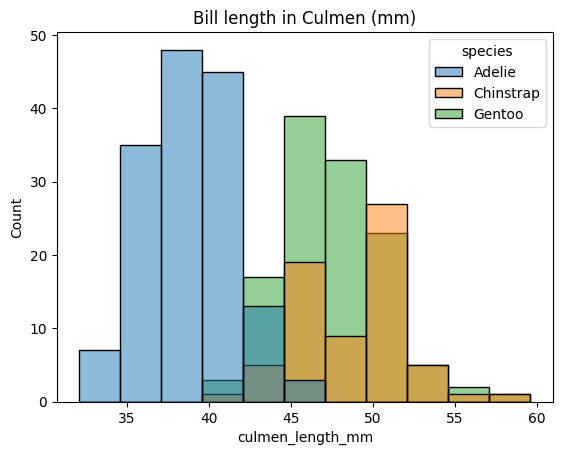

In [ ]:
sns.histplot(df,x='culmen_length_mm',hue='species').set(title='Bill length in Culmen (mm)')

[Text(0.5, 1.0, 'Bill Depth in Culmen (mm)')]

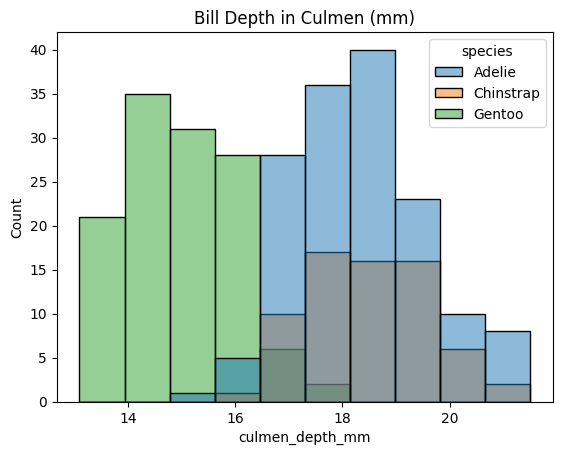

In [ ]:
sns.histplot(df,x='culmen_depth_mm',hue='species').set(title='Bill Depth in Culmen (mm)')

[Text(0.5, 1.0, 'Body Mass in all species')]

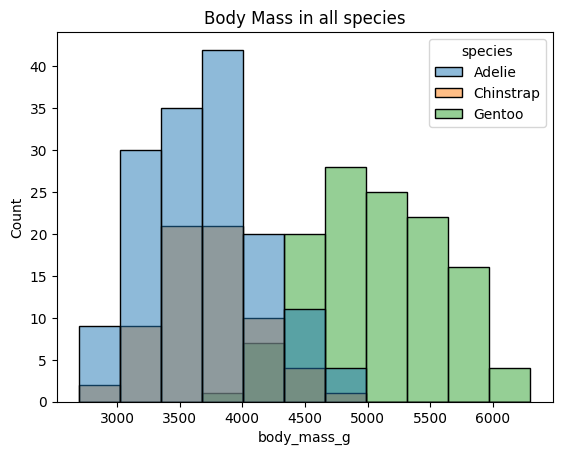

In [ ]:
sns.histplot(df,x='body_mass_g',hue='species').set(title='Body Mass in all species')

[Text(0.5, 1.0, 'Island based on Species')]

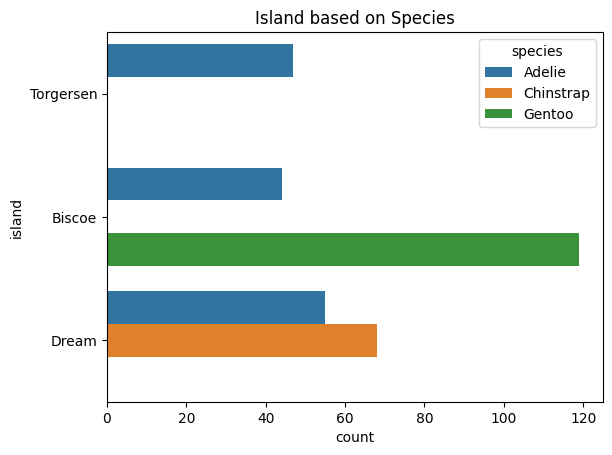

In [ ]:
sns.countplot(y='island',data=df,hue='species').set(title='Island based on Species')

[Text(0.5, 1.0, 'Island based on Sex')]

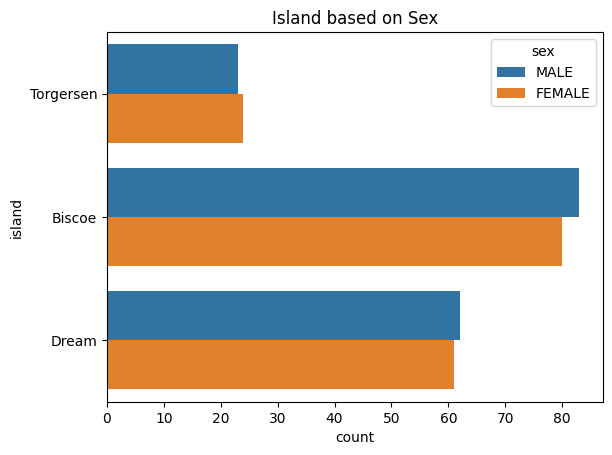

In [ ]:
sns.countplot(y='island',data=df,hue='sex').set(title='Island based on Sex')

***Handling missing values***

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [ ]:
df.loc[df['sex']=='.',['sex']] = np.nan

df.dropna(subset=['sex'],inplace=True)

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

***Bivariate Analysis***

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

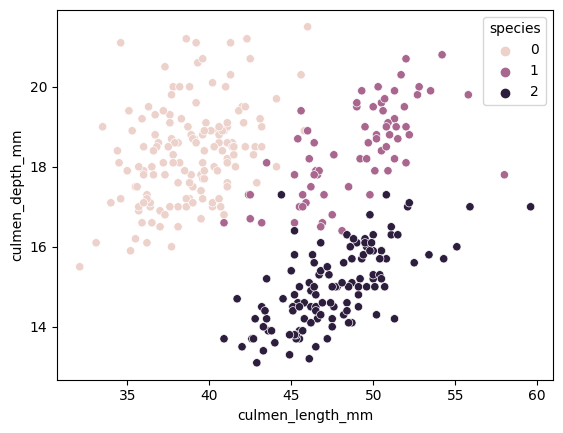

In [ ]:
sns.scatterplot(data=df,x='culmen_length_mm',y='culmen_depth_mm',hue='species')

<Axes: xlabel='species', ylabel='culmen_depth_mm'>

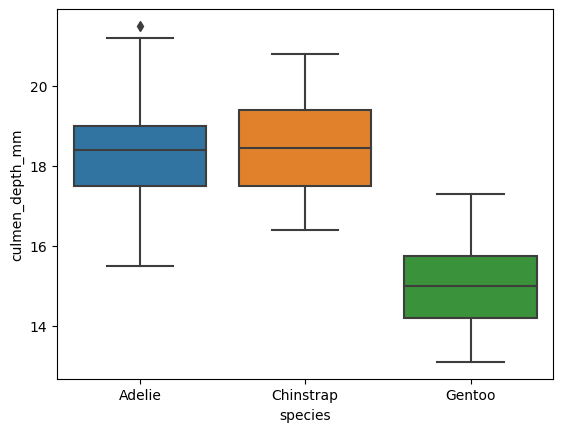

In [ ]:
sns.boxplot(data=df, x='species', y='culmen_depth_mm')

<Axes: xlabel='species', ylabel='culmen_length_mm'>

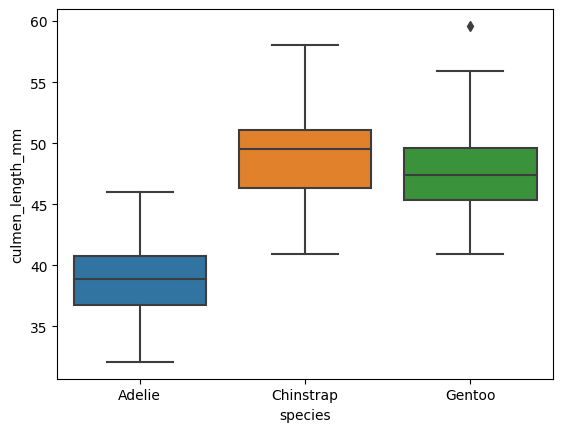

In [ ]:
sns.boxplot(data=df, x='species', y='culmen_length_mm')

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

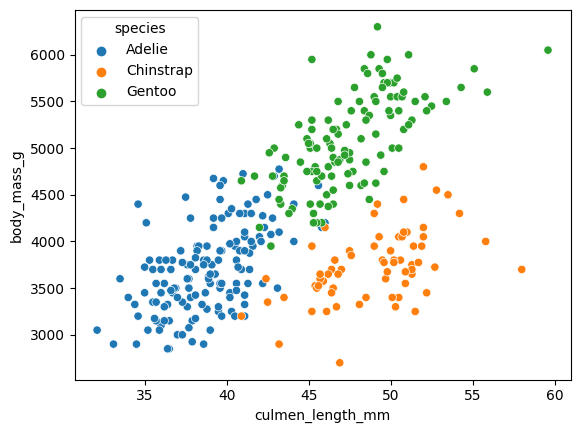

In [ ]:
sns.scatterplot(data=df,x='culmen_length_mm',y='body_mass_g',hue='species')

***Checking for Outliers by ploting***

<Axes: >

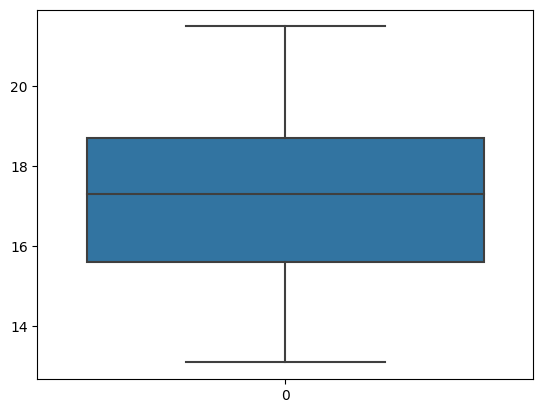

In [ ]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

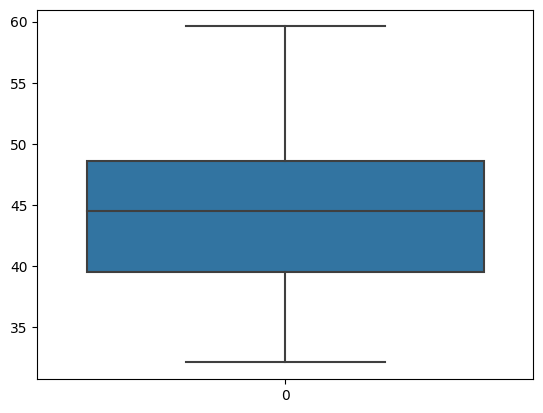

In [ ]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

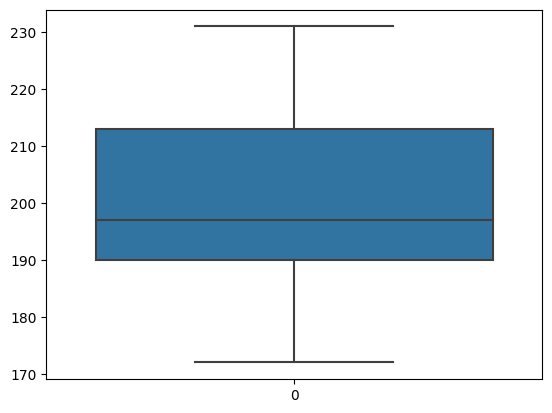

In [ ]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

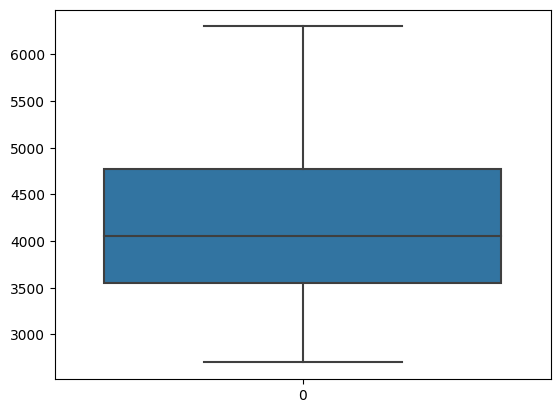

In [ ]:
sns.boxplot(df.body_mass_g)

***Multivariate Analysis***

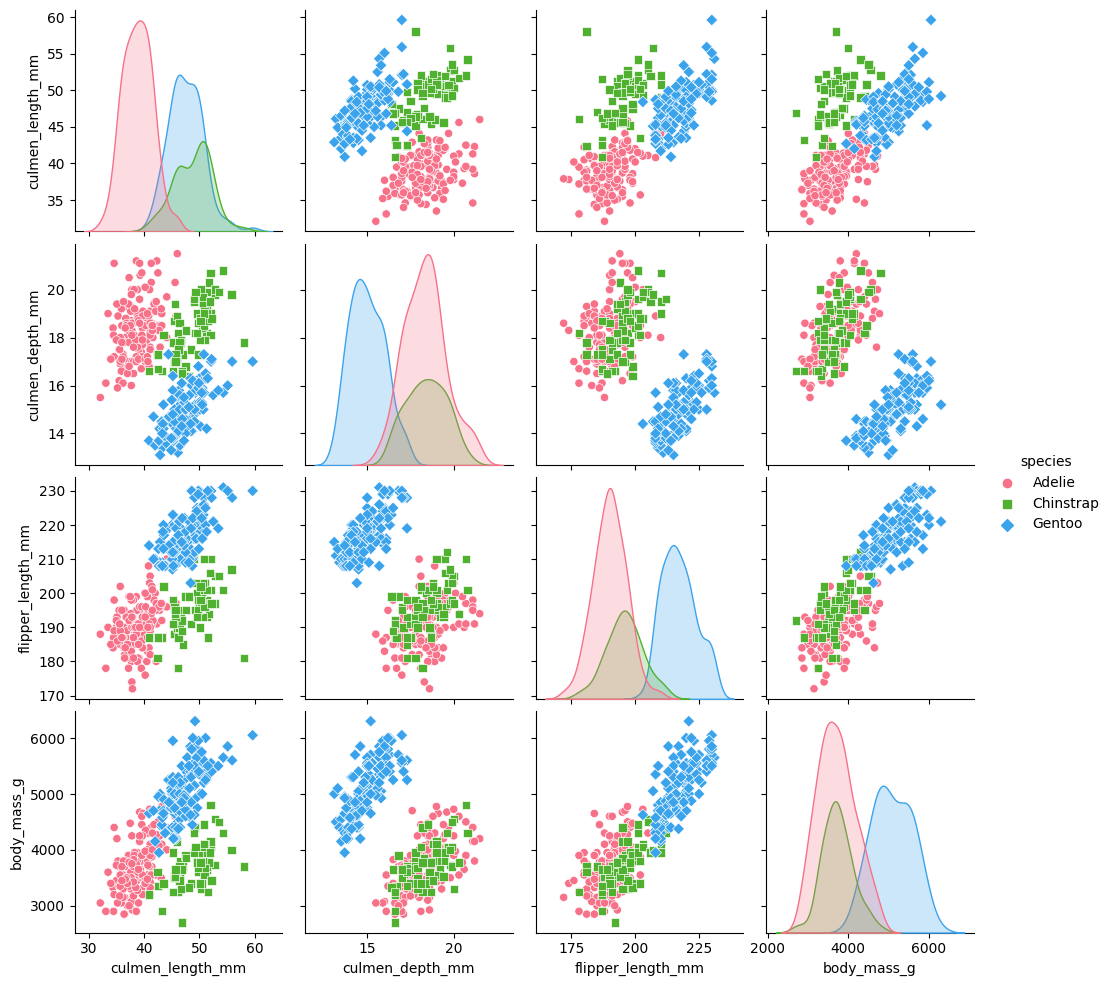

In [ ]:
sns.pairplot(df,hue='species',palette='husl',markers=['o','s','D']);

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


***Corelation with target column***

In [ ]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [ ]:
df.corr()['species']

species              1.000000
island              -0.622428
culmen_length_mm     0.730548
culmen_depth_mm     -0.740346
flipper_length_mm    0.850737
body_mass_g          0.750434
sex                  0.010964
Name: species, dtype: float64

***Label Encoding***

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.sex = le.fit_transform(df.sex)
df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


***Splitting***

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

***Scaling***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [ ]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.167273,0.738095,0.355932,0.208333,0.0
4,1.0,0.261818,0.892857,0.305085,0.263889,1.0


***Train Test Split and Checking the sizes***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
print("X_train shape=",X_train.shape,"\nX_test shape=",X_test.shape,
      "\ny_train shape=",y_train.shape,"\ny_test shape=",y_test.shape)

X_train shape= (266, 6) 
X_test shape= (67, 6) 
y_train shape= (266,) 
y_test shape= (67,)
